In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm 
from statsmodels.stats import diagnostic as diag
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import levene
from scipy.stats import ranksums

C:\Users\scsuser\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv('Enrolment History.csv', index_col=0)
df.columns = ['BPEELPParttime', 'Business', 'CreativeWriting', 'Engineering', 'iSchool', 
              'LangForeign', 'LangFrench', 'LectureSeries', 'LiberalStudies', 'GrandTotal']
df_lecture = (df.LectureSeries).dropna(axis=0, how='any')
df_lecture = df_lecture.append((df.GrandTotal).iloc[-2:,])

In [3]:
num1 = df.shape[0]-3
num2 = df_lecture.shape[0]-2

In [4]:
mod_grandtotal = sm.tsa.statespace.SARIMAX(df.GrandTotal, trend='n', order=(0,1,1), 
                                 seasonal_order=(0,1,0,3))
results_grandtotal = mod_grandtotal.fit()
print(results_grandtotal.summary())

                                 Statespace Model Results                                
Dep. Variable:                        GrandTotal   No. Observations:                   39
Model:             SARIMAX(0, 1, 1)x(0, 1, 0, 3)   Log Likelihood                -234.849
Date:                           Thu, 22 Feb 2018   AIC                            473.699
Time:                                   13:56:16   BIC                            477.026
Sample:                               05-01-2006   HQIC                           474.893
                                    - 01-01-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7336      0.118     -6.220      0.000      -0.965      -0.502
sigma2      1.327e+05   3.74e+04      3.548

C:\Users\scsuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\scsuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\scsuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [5]:
mod_liberal = sm.tsa.statespace.SARIMAX(df.LiberalStudies, trend='n', order=(2,1,0), 
                                 seasonal_order=(0,1,0,3))
results_liberal = mod_liberal.fit()
print(results_liberal.summary())

                                 Statespace Model Results                                
Dep. Variable:                    LiberalStudies   No. Observations:                   39
Model:             SARIMAX(2, 1, 0)x(0, 1, 0, 3)   Log Likelihood                -193.625
Date:                           Thu, 22 Feb 2018   AIC                            393.250
Time:                                   13:56:16   BIC                            398.240
Sample:                               05-01-2006   HQIC                           395.040
                                    - 01-01-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2640      0.252     -1.048      0.295      -0.758       0.230
ar.L2         -0.6906      0.198     -3.486

C:\Users\scsuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\scsuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\scsuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [6]:
mod_lecture = sm.tsa.statespace.SARIMAX(df_lecture, trend='n', order=(1,1,0), 
                                 seasonal_order=(0,0,0,2))
results_lecture = mod_lecture.fit()
print(results_lecture.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                   26
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -128.939
Date:                Thu, 22 Feb 2018   AIC                            261.879
Time:                        13:56:17   BIC                            264.395
Sample:                    09-01-2006   HQIC                           262.604
                         - 01-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9168      0.065    -14.062      0.000      -1.045      -0.789
sigma2      4050.2558   1430.884      2.831      0.005    1245.774    6854.737
Ljung-Box (Q):                         nan   Jarque-

C:\Users\scsuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\scsuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\scsuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [7]:
mod_langfrench = sm.tsa.statespace.SARIMAX(df.LangFrench, trend='n', order=(1,1,0), 
                                 seasonal_order=(1,1,0,3))
results_langfrench = mod_langfrench.fit()
print(results_langfrench.summary())

                                 Statespace Model Results                                
Dep. Variable:                        LangFrench   No. Observations:                   39
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 3)   Log Likelihood                -166.600
Date:                           Thu, 22 Feb 2018   AIC                            339.200
Time:                                   13:56:17   BIC                            344.191
Sample:                               05-01-2006   HQIC                           340.991
                                    - 01-01-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4006      0.155     -2.591      0.010      -0.704      -0.098
ar.S.L3       -0.6268      0.132     -4.762

C:\Users\scsuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\scsuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\scsuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [8]:
mod_engineer = sm.tsa.statespace.SARIMAX(df.Engineering, trend='n', order=(1,2,0), 
                                 seasonal_order=(1,1,0,3))
results_engineer = mod_engineer.fit()
print(results_engineer.summary())

                                 Statespace Model Results                                
Dep. Variable:                       Engineering   No. Observations:                   39
Model:             SARIMAX(1, 2, 0)x(1, 1, 0, 3)   Log Likelihood                -171.292
Date:                           Thu, 22 Feb 2018   AIC                            348.585
Time:                                   13:56:18   BIC                            353.575
Sample:                               05-01-2006   HQIC                           350.375
                                    - 01-01-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6433      0.171     -3.769      0.000      -0.978      -0.309
ar.S.L3       -0.6069      0.176     -3.449

C:\Users\scsuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\scsuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\scsuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [9]:
mod_creative = sm.tsa.statespace.SARIMAX(df.CreativeWriting, trend='n', order=(1,1,0), 
                                 seasonal_order=(0,1,0,3))
results_creative = mod_creative.fit()
print(results_creative.summary())

                                 Statespace Model Results                                
Dep. Variable:                   CreativeWriting   No. Observations:                   39
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 3)   Log Likelihood                -186.540
Date:                           Thu, 22 Feb 2018   AIC                            377.080
Time:                                   13:56:18   BIC                            380.407
Sample:                               05-01-2006   HQIC                           378.273
                                    - 01-01-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7016      0.159     -4.410      0.000      -1.013      -0.390
sigma2      6635.0940   1922.046      3.452

C:\Users\scsuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\scsuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\scsuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [10]:
mod_bpeelppart = sm.tsa.statespace.SARIMAX(df.BPEELPParttime, trend='n', order=(1,1,0), 
                                 seasonal_order=(0,1,0,3))
results_bpeelppart = mod_bpeelppart.fit()
print(results_bpeelppart.summary())

                                 Statespace Model Results                                
Dep. Variable:                    BPEELPParttime   No. Observations:                   39
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 3)   Log Likelihood                -169.975
Date:                           Thu, 22 Feb 2018   AIC                            343.950
Time:                                   13:56:18   BIC                            347.277
Sample:                               05-01-2006   HQIC                           345.144
                                    - 01-01-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4823      0.210     -2.300      0.021      -0.893      -0.071
sigma2      2386.2485    752.192      3.172

C:\Users\scsuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\scsuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\scsuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [11]:
mod_langforeign = sm.tsa.statespace.SARIMAX(df.LangForeign, trend='n', order=(0,1,0), 
                                 seasonal_order=(0,1,1,3))
results_langforeign = mod_langforeign.fit()
print(results_langforeign.summary())

                                 Statespace Model Results                                
Dep. Variable:                       LangForeign   No. Observations:                   39
Model:             SARIMAX(0, 1, 0)x(0, 1, 1, 3)   Log Likelihood                -164.552
Date:                           Thu, 22 Feb 2018   AIC                            333.103
Time:                                   13:56:19   BIC                            336.430
Sample:                               05-01-2006   HQIC                           334.297
                                    - 01-01-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L3       -0.7769      0.228     -3.409      0.001      -1.224      -0.330
sigma2      1572.7933    488.874      3.217

C:\Users\scsuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\scsuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\scsuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [12]:
mod_business = sm.tsa.statespace.SARIMAX(df.Business, trend='n', order=(0,1,1), 
                                 seasonal_order=(0,1,0,3))
results_business = mod_business.fit()
print(results_business.summary())

                                 Statespace Model Results                                
Dep. Variable:                          Business   No. Observations:                   39
Model:             SARIMAX(0, 1, 1)x(0, 1, 0, 3)   Log Likelihood                -224.385
Date:                           Thu, 22 Feb 2018   AIC                            452.769
Time:                                   13:56:19   BIC                            456.097
Sample:                               05-01-2006   HQIC                           453.963
                                    - 01-01-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6311      0.124     -5.096      0.000      -0.874      -0.388
sigma2       7.04e+04   1.89e+04      3.732

C:\Users\scsuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\scsuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\scsuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [13]:
residual_business = np.array(results_business.resid.iloc[:(df.LiberalStudies.shape[0]-3)])
diag.acorr_ljungbox(residual_business, lags = 24)

(array([  2.04942343,   9.2059251 ,  11.60341578,  11.72018484,
         12.31095564,  12.43308079,  13.40275586,  13.42667362,
         14.11803626,  14.12109349,  14.15309554,  14.23192314,
         14.24168891,  14.24543556,  14.48891068,  14.62652893,
         15.37410133,  15.55835088,  15.68554006,  15.93761851,
         16.02679573,  16.17392657,  19.50841894,  21.17842332]),
 array([ 0.15226384,  0.0100221 ,  0.00887285,  0.01955799,  0.03076666,
         0.05297599,  0.06288253,  0.09798808,  0.11818797,  0.16753948,
         0.22463756,  0.28614399,  0.35704599,  0.43159061,  0.48881821,
         0.55214303,  0.56855498,  0.62333975,  0.67814499,  0.72048669,
         0.76814367,  0.80716088,  0.67135365,  0.6281784 ]))

In [14]:
residual_liberal = np.array(results_liberal.resid.iloc[:num1])
diag.acorr_ljungbox(residual_liberal, lags = 24)

(array([  1.50591568,   5.94206234,   6.01842269,   6.77091183,
          7.58226458,   9.06640518,   9.19912485,   9.26924619,
          9.33271371,   9.34567013,   9.63207127,   9.96693973,
         10.18285967,  10.18675059,  10.43962784,  10.45275456,
         10.6171994 ,  10.66339051,  10.66410282,  10.6787053 ,
         10.95349042,  11.34675312,  11.42651293,  11.43019541]),
 array([ 0.21976338,  0.05125044,  0.11071735,  0.14850119,  0.18081034,
         0.16987779,  0.23867417,  0.3200944 ,  0.40714583,  0.49964233,
         0.56375431,  0.61886113,  0.67891728,  0.74840636,  0.79121335,
         0.8419399 ,  0.87575802,  0.90809113,  0.93462088,  0.95413288,
         0.96368491,  0.96944395,  0.97840018,  0.98559885]))

In [15]:
residual_lecture = np.array(results_lecture.resid.iloc[:num2])
diag.acorr_ljungbox(residual_lecture, lags = 18)

(array([ 1.16780897,  2.18898636,  2.30587631,  2.31037063,  2.93662934,
         2.93687044,  2.94173911,  2.97066438,  2.9725345 ,  2.99995927,
         3.13916357,  3.16949056,  3.86299688,  4.07512803,  6.09684578,
         6.25020418,  7.90263643,  7.90745409]),
 array([ 0.2798519 ,  0.3347092 ,  0.5113961 ,  0.67888156,  0.70975524,
         0.81672756,  0.890339  ,  0.93618499,  0.96537392,  0.98142502,
         0.98875588,  0.9942245 ,  0.99256329,  0.99499707,  0.97807464,
         0.98516038,  0.9685844 ,  0.9799825 ]))

In [16]:
residual_langfrench = np.array(results_langfrench.resid.iloc[:num1])
diag.acorr_ljungbox(residual_langfrench, lags = 24)

(array([  0.18252108,   5.04657405,   6.2795974 ,   9.10844448,
          9.2508512 ,  10.84085905,  10.84886178,  13.34510712,
         13.3964425 ,  14.33699987,  15.85583997,  15.92858012,
         16.15701377,  16.69057117,  16.69669472,  16.75107127,
         17.34711114,  17.35143031,  18.45411023,  18.50898292,
         18.80264053,  19.17415148,  19.58668309,  23.73003205]),
 array([ 0.66921556,  0.08019557,  0.09877188,  0.05844531,  0.09946725,
         0.09342117,  0.14534882,  0.10051435,  0.14547272,  0.15816746,
         0.14656772,  0.19452917,  0.24075508,  0.27304263,  0.33731694,
         0.40187926,  0.43109944,  0.49908077,  0.49232156,  0.55391717,
         0.59779891,  0.63455119,  0.6666982 ,  0.47711869]))

In [17]:
residual_engineer = np.array(results_engineer.resid.iloc[9:num1])
diag.acorr_ljungbox(residual_engineer, lags = 24)

(array([  1.17667661,   4.27434459,   5.58636294,   5.81717004,
          9.28522837,   9.29769561,  10.00576253,  11.06330734,
         12.66499552,  12.66578711,  14.37632277,  15.9300865 ,
         16.37021103,  16.82211287,  16.82409417,  18.85829285,
         20.5792159 ,  21.10452136,  21.18252398,  23.59748386,
         23.68518323,  24.2825843 ,  24.35307075,  24.37303309]),
 array([ 0.27803361,  0.11798801,  0.13356344,  0.21322452,  0.09821407,
         0.15751506,  0.18824714,  0.19813786,  0.1783599 ,  0.24296285,
         0.21286483,  0.19445926,  0.22971514,  0.26578153,  0.3294884 ,
         0.27608014,  0.24567941,  0.27417266,  0.3268037 ,  0.26041703,
         0.30856096,  0.33259313,  0.38447854,  0.44044001]))

In [18]:
residual_creative = np.array(results_creative.resid.iloc[:num1])
diag.acorr_ljungbox(residual_creative, lags = 24)

(array([  0.05211928,   4.19699512,   4.24666708,   4.92225162,
          6.12584216,   6.53947105,   6.60567461,   6.60961688,
          7.26885186,   8.41479396,   9.12572582,   9.32403208,
          9.40459442,  12.72323549,  12.89778898,  17.06310275,
         17.46318499,  18.80018737,  19.32400297,  19.40666158,
         19.82168161,  20.66010092,  20.86538441,  20.97011994]),
 array([ 0.81941577,  0.12264055,  0.23603096,  0.2953684 ,  0.29416584,
         0.36554065,  0.47105715,  0.57927619,  0.60915023,  0.58838913,
         0.61028838,  0.67503287,  0.74174622,  0.54842281,  0.61019251,
         0.38152516,  0.42343671,  0.40422369,  0.43623529,  0.49555126,
         0.53257999,  0.54182076,  0.58930812,  0.64048732]))

In [19]:
residual_bpeelppart = np.array(results_bpeelppart.resid.iloc[:num1])
diag.acorr_ljungbox(residual_bpeelppart, lags = 24)

(array([  0.25800198,   0.27347975,   2.04471235,   2.05031427,
          2.12146122,   3.91803433,   6.07336741,   6.5864551 ,
          6.61099938,   7.38137741,   8.5597026 ,  10.16497779,
         10.45355481,  11.20267604,  12.63947166,  13.35679439,
         16.2650228 ,  18.97637909,  19.00436932,  19.01662937,
         19.33180705,  19.69817663,  19.699607  ,  20.1778019 ]),
 array([ 0.61149616,  0.87219708,  0.56317854,  0.72650505,  0.83209615,
         0.68776769,  0.53120925,  0.58183477,  0.67754713,  0.68901638,
         0.66246111,  0.6014898 ,  0.65649126,  0.67004585,  0.63012277,
         0.64651303,  0.50513096,  0.39327942,  0.45655586,  0.52074533,
         0.56386419,  0.6019131 ,  0.65995804,  0.68662126]))

In [20]:
residual_langforeign = np.array(results_langforeign.resid.iloc[:num1])
diag.acorr_ljungbox(residual_langforeign, lags = 24)

(array([  0.21969722,   2.62103069,   8.94712312,   9.02776362,
          9.06071378,   9.62615654,   9.98909523,  10.07608563,
         10.67607105,  10.70247025,  12.25965008,  12.2742034 ,
         13.83009099,  13.90295673,  13.90577191,  14.02097675,
         14.20563961,  14.23846906,  14.57935669,  15.66106697,
         16.38647832,  17.18211526,  17.35972448,  17.82768446]),
 array([ 0.63927072,  0.26968104,  0.03000224,  0.06040926,  0.10666686,
         0.14130403,  0.18919227,  0.25972628,  0.29856761,  0.38116322,
         0.34444606,  0.42391694,  0.38591779,  0.45696568,  0.53268732,
         0.59715104,  0.65249578,  0.71341866,  0.74893157,  0.73741593,
         0.74755839,  0.75323102,  0.79123416,  0.81128651]))

In [21]:
predict_business = results_business.get_prediction(full_results=True,alpha=0.05)
predi_mean_business = predict_business.predicted_mean
predi_mea_business = predi_mean_business.iloc[4:]

predi_conf_business = predict_business.conf_int(alpha=0.05)
predi_conf_business.columns = ['lower', 'upper']
predi_con_business = predi_conf_business.iloc[4:]
df_b = pd.DataFrame(predi_con_business, columns=['lower', 'upper'])
df_b['mean'] = predi_mea_business
df_b = df_b[['mean', 'lower', 'upper']]
df_b.transpose().to_csv('prediction_business.csv')

In [22]:
predict_grandtotal = results_grandtotal.get_prediction(full_results=True,alpha=0.05)
predi_mean_grandtotal = predict_grandtotal.predicted_mean
predi_mea_grandtotal = predi_mean_grandtotal.iloc[4:]

predi_conf_grandtotal = predict_grandtotal.conf_int(alpha=0.05)
predi_conf_grandtotal.columns = ['lower', 'upper']
predi_con_grandtotal = predi_conf_grandtotal.iloc[4:]
df_g = pd.DataFrame(predi_con_grandtotal, columns=['lower', 'upper'])
df_g['mean'] = predi_mea_grandtotal
df_g = df_g[['mean', 'lower', 'upper']]
df_g.transpose().to_csv('prediction_grandtotal.csv')

In [23]:
predict_liberal = results_liberal.get_prediction(full_results=True,alpha=0.05)
predi_mean_liberal = predict_liberal.predicted_mean
predi_mea_liberal = predi_mean_liberal.iloc[4:]

predi_conf_liberal = predict_liberal.conf_int(alpha=0.05)
predi_conf_liberal.columns = ['lower', 'upper']
predi_con_liberal = predi_conf_liberal.iloc[4:]
df_l = pd.DataFrame(predi_con_liberal, columns=['lower', 'upper'])
df_l['mean'] = predi_mea_liberal
df_l = df_l[['mean', 'lower', 'upper']]
df_l.transpose().to_csv('prediction_liberal.csv')

In [24]:
predict_lecture = results_lecture.get_prediction(full_results=True,alpha=0.05)
predi_mean_lecture = predict_lecture.predicted_mean
predi_mea_lecture = predi_mean_lecture.iloc[3:]

predi_conf_lecture = predict_lecture.conf_int(alpha=0.05)
predi_conf_lecture.columns = ['lower', 'upper']
predi_con_lecture = predi_conf_lecture.iloc[3:]
df_b = pd.DataFrame(predi_con_lecture, columns=['lower', 'upper'])
df_b['mean'] = predi_mea_lecture
df_b = df_b[['mean', 'lower', 'upper']]
df_b.transpose().to_csv('prediction_lecture.csv')

In [25]:
predict_langfrench = results_langfrench.get_prediction(full_results=True,alpha=0.05)
predi_mean_langfrench = predict_langfrench.predicted_mean
predi_mea_langfrench = predi_mean_langfrench.iloc[6:]

predi_conf_langfrench = predict_langfrench.conf_int(alpha=0.05)
predi_conf_langfrench.columns = ['lower', 'upper']
predi_con_langfrench = predi_conf_langfrench.iloc[6:]
df_b = pd.DataFrame(predi_con_langfrench, columns=['lower', 'upper'])
df_b['mean'] = predi_mea_langfrench
df_b = df_b[['mean', 'lower', 'upper']]
df_b.transpose().to_csv('prediction_langfrench.csv')

In [26]:
predict_engineer = results_engineer.get_prediction(full_results=True,alpha=0.05)
predi_mean_engineer = predict_engineer.predicted_mean
predi_mea_engineer = predi_mean_engineer.iloc[13:]

predi_conf_engineer = predict_engineer.conf_int(alpha=0.05)
predi_conf_engineer.columns = ['lower', 'upper']
predi_con_engineer = predi_conf_engineer.iloc[13:]
df_e = pd.DataFrame(predi_con_engineer, columns=['lower', 'upper'])
df_e['mean'] = predi_mea_engineer
df_e = df_e[['mean', 'lower', 'upper']]
df_e.transpose().to_csv('prediction_engineer.csv')

In [27]:
predict_creative = results_creative.get_prediction(full_results=True,alpha=0.05)
predi_mean_creative = predict_creative.predicted_mean
predi_mea_creative = predi_mean_creative.iloc[4:]

predi_conf_creative = predict_creative.conf_int(alpha=0.05)
predi_conf_creative.columns = ['lower', 'upper']
predi_con_creative = predi_conf_creative.iloc[4:]
df_b = pd.DataFrame(predi_con_creative, columns=['lower', 'upper'])
df_b['mean'] = predi_mea_creative
df_b = df_b[['mean', 'lower', 'upper']]
df_b.transpose().to_csv('prediction_creative.csv')

In [28]:
predict_bpeelppart = results_bpeelppart.get_prediction(full_results=True,alpha=0.05)
predi_mean_bpeelppart = predict_bpeelppart.predicted_mean
predi_mea_bpeelppart = predi_mean_bpeelppart.iloc[5:]

predi_conf_bpeelppart = predict_bpeelppart.conf_int(alpha=0.05)
predi_conf_bpeelppart.columns = ['lower', 'upper']
predi_con_bpeelppart = predi_conf_bpeelppart.iloc[5:]
df_elp = pd.DataFrame(predi_con_bpeelppart, columns=['lower', 'upper'])
df_elp['mean'] = predi_mea_bpeelppart
df_elp = df_elp[['mean', 'lower', 'upper']]
df_elp.transpose().to_csv('prediction_bpeelppart.csv')

In [29]:
predict_langforeign = results_langforeign.get_prediction(full_results=True,alpha=0.05)
predi_mean_langforeign = predict_langforeign.predicted_mean
predi_mea_langforeign = predi_mean_langforeign.iloc[5:]

predi_conf_langforeign = predict_langforeign.conf_int(alpha=0.05)
predi_conf_langforeign.columns = ['lower', 'upper']
predi_con_langforeign = predi_conf_langforeign.iloc[5:]
df_for = pd.DataFrame(predi_con_langforeign, columns=['lower', 'upper'])
df_for['mean'] = predi_mea_langforeign
df_for = df_for[['mean', 'lower', 'upper']]
df_for.transpose().to_csv('prediction_langfor.csv')

In [30]:
y_forecasted = predi_mean_grandtotal.iloc[4:num1]
y_truth = df.GrandTotal.iloc[4:num1]
rmse = np.sqrt(((y_forecasted - y_truth) ** 2).mean())
mape = np.mean(np.abs((y_truth - y_forecasted) / y_truth))
mpe = (np.sum((y_truth - y_forecasted) / y_truth))/33
me = (np.sum(y_truth - y_forecasted))/33

print("Grand Total")
print('ME: {}'.format(me))
print('MPE: {}'.format(mpe))
print('RMSE: {}'.format(rmse))
print('MAPE: {}'.format(mape))
print('MAE: {}'.format(mean_absolute_error(y_truth, y_forecasted)))
print('R**2: {}'.format(r2_score(y_truth, y_forecasted)))

Grand Total
ME: -94.1599766542688
MPE: -0.0129302938977226
RMSE: 370.4814101563671
MAPE: 0.0430936190319908
MAE: 304.9483876874108
R**2: 0.9680748227347007


In [31]:
y_forecasted = predi_mean_business.iloc[4:num1]
y_truth = df.Business.iloc[4:num1]
rmse = np.sqrt(((y_forecasted - y_truth) ** 2).mean())
mape = np.mean(np.abs((y_truth - y_forecasted) / y_truth))
mpe = (np.sum((y_truth - y_forecasted) / y_truth))/33
me = (np.sum(y_truth - y_forecasted))/33

print("Business")
print('ME: {}'.format(me))
print('MPE: {}'.format(mpe))
print('RMSE: {}'.format(rmse))
print('MAPE: {}'.format(mape))
print('MAE: {}'.format(mean_absolute_error(y_truth, y_forecasted)))
print('R**2: {}'.format(r2_score(y_truth, y_forecasted)))

Business
ME: -62.47497122662213
MPE: -0.013931912427608948
RMSE: 267.0410972186766
MAPE: 0.046609364713462435
MAE: 216.72115858355906
R**2: 0.9635890975419584


In [32]:
y_forecasted = predi_mean_langforeign.iloc[5:num1]
y_truth = df.LangForeign.iloc[5:num1]
rmse = np.sqrt(((y_forecasted - y_truth) ** 2).mean())
mape = np.mean(np.abs((y_truth - y_forecasted) / y_truth))
mpe = (np.sum((y_truth - y_forecasted) / y_truth))/33
me = (np.sum(y_truth - y_forecasted))/33

print("Languages - Foreign")
print('ME: {}'.format(me))
print('MPE: {}'.format(mpe))
print('RMSE: {}'.format(rmse))
print('MAPE: {}'.format(mape))
print('MAE: {}'.format(mean_absolute_error(y_truth, y_forecasted)))
print('R**2: {}'.format(r2_score(y_truth, y_forecasted)))

Languages - Foreign
ME: 1.8240331519260709
MPE: -0.0010969885882922983
RMSE: 41.81389077761385
MAPE: 0.07725855362343073
MAE: 32.61610521382902
R**2: 0.777948344545203


In [33]:
y_forecasted = predi_mean_liberal.iloc[4:num1]
y_truth = df.LiberalStudies.iloc[4:num1]
rmse = np.sqrt(((y_forecasted - y_truth) ** 2).mean())
mape = np.mean(np.abs((y_truth - y_forecasted) / y_truth))
mpe = (np.sum((y_truth - y_forecasted) / y_truth))/33
me = (np.sum(y_truth - y_forecasted))/33

print("Liberal Studies - Core")
print('ME: {}'.format(me))
print('MPE: {}'.format(mpe))
print('RMSE: {}'.format(rmse))
print('MAPE: {}'.format(mape))
print('MAE: {}'.format(mean_absolute_error(y_truth, y_forecasted)))
print('R**2: {}'.format(r2_score(y_truth, y_forecasted)))

Liberal Studies - Core
ME: -4.2824614298100006
MPE: -0.06370986113700115
RMSE: 103.43294086635848
MAPE: 0.22090403799911118
MAE: 73.316568327338
R**2: 0.8116284468061769


In [34]:
y_forecasted = predi_mean_lecture.iloc[3:num2]
y_truth = df_lecture.iloc[3:num2]
rmse = np.sqrt(((y_forecasted - y_truth) ** 2).mean())
mape = np.mean(np.abs((y_truth - y_forecasted) / y_truth))
mpe = (np.sum((y_truth - y_forecasted) / y_truth))/33
me = (np.sum(y_truth - y_forecasted))/33

print("Lecture Series")
print('ME: {}'.format(me))
print('MPE: {}'.format(mpe))
print('RMSE: {}'.format(rmse))
print('MAPE: {}'.format(mape))
print('MAE: {}'.format(mean_absolute_error(y_truth, y_forecasted)))
print('R**2: {}'.format(r2_score(y_truth, y_forecasted)))

Lecture Series
ME: -0.8783835386768353
MPE: -0.012099792716568214
RMSE: 55.065258846942235
MAPE: 0.11342451229701539
MAE: 42.07274473974915
R**2: 0.3865227941355939


In [35]:
y_forecasted = predi_mean_langfrench.iloc[5:num1]
y_truth = df.LangFrench.iloc[5:num1]
rmse = np.sqrt(((y_forecasted - y_truth) ** 2).mean())
mape = np.mean(np.abs((y_truth - y_forecasted) / y_truth))
mpe = (np.sum((y_truth - y_forecasted) / y_truth))/33
me = (np.sum(y_truth - y_forecasted))/33

print("Languages - French")
print('ME: {}'.format(me))
print('MPE: {}'.format(mpe))
print('RMSE: {}'.format(rmse))
print('MAPE: {}'.format(mape))
print('MAE: {}'.format(mean_absolute_error(y_truth, y_forecasted)))
print('R**2: {}'.format(r2_score(y_truth, y_forecasted)))

Languages - French
ME: -0.3073057110792355
MPE: -0.011761446703388558
RMSE: 41.99997909736413
MAPE: 0.1391781918568852
MAE: 34.87181634820251
R**2: 0.43710384056697227


In [36]:
y_forecasted = predi_mean_engineer.iloc[10:num1]
y_truth = df.Engineering.iloc[10:num1]
rmse = np.sqrt(((y_forecasted - y_truth) ** 2).mean())
mape = np.mean(np.abs((y_truth - y_forecasted) / y_truth))
mpe = (np.sum((y_truth - y_forecasted) / y_truth))/33
me = (np.sum(y_truth - y_forecasted))/33

print("Engineering")
print('ME: {}'.format(me))
print('MPE: {}'.format(mpe))
print('RMSE: {}'.format(rmse))
print('MAPE: {}'.format(mape))
print('MAE: {}'.format(mean_absolute_error(y_truth, y_forecasted)))
print('R**2: {}'.format(r2_score(y_truth, y_forecasted)))

Engineering
ME: -1.4092708850889712
MPE: -0.0419044892808532
RMSE: 88.60533493299523
MAPE: 0.23739055229949607
MAE: 68.77501405225593
R**2: 0.7825492374602804


In [37]:
y_forecasted = predi_mean_creative.iloc[2:num1]
y_truth = df.CreativeWriting.iloc[2:num1]
rmse = np.sqrt(((y_forecasted - y_truth) ** 2).mean())
mape = np.mean(np.abs((y_truth - y_forecasted) / y_truth))
mpe = (np.sum((y_truth - y_forecasted) / y_truth))/33
me = (np.sum(y_truth - y_forecasted))/33

print("Creative Writing")
print('ME: {}'.format(me))
print('MPE: {}'.format(mpe))
print('RMSE: {}'.format(rmse))
print('MAPE: {}'.format(mape))
print('MAE: {}'.format(mean_absolute_error(y_truth, y_forecasted)))
print('R**2: {}'.format(r2_score(y_truth, y_forecasted)))

Creative Writing
ME: -9.850725437674095
MPE: -0.04889381217075023
RMSE: 85.22399488309911
MAPE: 0.1501972629645652
MAE: 68.71618588550446
R**2: 0.7162404891715662


In [38]:
y_forecasted = predi_mean_bpeelppart.iloc[:num1]
y_truth = df.BPEELPParttime.iloc[:num1]
rmse = np.sqrt(((y_forecasted - y_truth) ** 2).mean())
mape = np.mean(np.abs((y_truth - y_forecasted) / y_truth))
mpe = (np.sum((y_truth - y_forecasted) / y_truth))/33
me = (np.sum(y_truth - y_forecasted))/33

print("BP & E - ELP Part-time")
print('ME: {}'.format(me))
print('MPE: {}'.format(mpe))
print('RMSE: {}'.format(rmse))
print('MAPE: {}'.format(mape))
print('MAE: {}'.format(mean_absolute_error(y_truth, y_forecasted)))
print('R**2: {}'.format(r2_score(y_truth, y_forecasted)))

BP & E - ELP Part-time
ME: -3.5242742459765464
MPE: 0.0003671567069878351
RMSE: 49.24401076240056
MAPE: 0.18530409405851966
MAE: 40.41542692695093
R**2: 0.6939869743020565


In [39]:
predi_mea_business

2007-09-01    3113.773828
2008-01-01    3048.326185
2008-05-01    1811.204899
2008-09-01    3522.336559
2009-01-01    3525.873839
2009-05-01    2366.769134
2009-09-01    3977.294810
2010-01-01    3844.427105
2010-05-01    3027.349092
2010-09-01    4711.155962
2011-01-01    4561.011004
2011-05-01    3434.477739
2011-09-01    5375.466127
2012-01-01    4923.842349
2012-05-01    4020.833590
2012-09-01    5944.162715
2013-01-01    5201.229404
2013-05-01    3963.759505
2013-09-01    5975.669289
2014-01-01    5784.366206
2014-05-01    4243.120747
2014-09-01    6717.144767
2015-01-01    6429.060594
2015-05-01    4902.857637
2015-09-01    6993.422192
2016-01-01    6323.534006
2016-05-01    4753.031328
2016-09-01    7284.034485
2017-01-01    6412.799688
2017-05-01    4177.506691
2017-09-01    6689.509408
2018-01-01    6150.323163
2018-05-01    4420.497258
2018-09-01    6758.497258
2019-01-01    5393.497258
Freq: 4MS, dtype: float64

In [52]:
df.Business.iloc[4:36]

01-Sep-07    2963.0
01-Jan-08    2978.0
01-May-08    1906.0
01-Sep-08    3492.0
01-Jan-09    3292.0
01-May-09    2433.0
01-Sep-09    4159.0
01-Jan-10    3958.0
01-May-10    2913.0
01-Sep-10    4849.0
01-Jan-11    4340.0
01-May-11    3448.0
01-Sep-11    5531.0
01-Jan-12    4894.0
01-May-12    3588.0
01-Sep-12    5657.0
01-Jan-13    5387.0
01-May-13    3809.0
01-Sep-13    6189.0
01-Jan-14    5884.0
01-May-14    4498.0
01-Sep-14    6763.0
01-Jan-15    6049.0
01-May-15    4430.0
01-Sep-15    7113.0
01-Jan-16    6455.0
01-May-16    4341.0
01-Sep-16    6706.0
01-Jan-17    6084.0
01-May-17    4576.0
01-Sep-17    6914.0
01-Jan-18    5549.0
Name: Business, dtype: float64

In [55]:
predi_con_business.index

DatetimeIndex(['2007-09-01', '2008-01-01', '2008-05-01', '2008-09-01',
               '2009-01-01', '2009-05-01', '2009-09-01', '2010-01-01',
               '2010-05-01', '2010-09-01', '2011-01-01', '2011-05-01',
               '2011-09-01', '2012-01-01', '2012-05-01', '2012-09-01',
               '2013-01-01', '2013-05-01', '2013-09-01', '2014-01-01',
               '2014-05-01', '2014-09-01', '2015-01-01', '2015-05-01',
               '2015-09-01', '2016-01-01', '2016-05-01', '2016-09-01',
               '2017-01-01', '2017-05-01', '2017-09-01', '2018-01-01',
               '2018-05-01', '2018-09-01', '2019-01-01'],
              dtype='datetime64[ns]', freq='4MS')

In [1]:
# ax = predi_mea_business.plot(figsize=(5, 3), label = "Predicted")
# df.Business.iloc[4:37].plot(figsize=(5, 3), marker='o', color = 'cornflowerblue', linestyle = 'None', label = "Actual", ax=ax)

# ax.fill_between(predi_con_business.index,
#                 predi_con_business.iloc[:, 0],
#                 predi_con_business.iloc[:, 1], color='lightgrey')

# ax.set_xlabel('Date')
# ax.set_ylabel('Forecast')
# ax.set_title('Forecasts for Enrolment - Business')
# plt.legend(loc=4)
# plt.show()

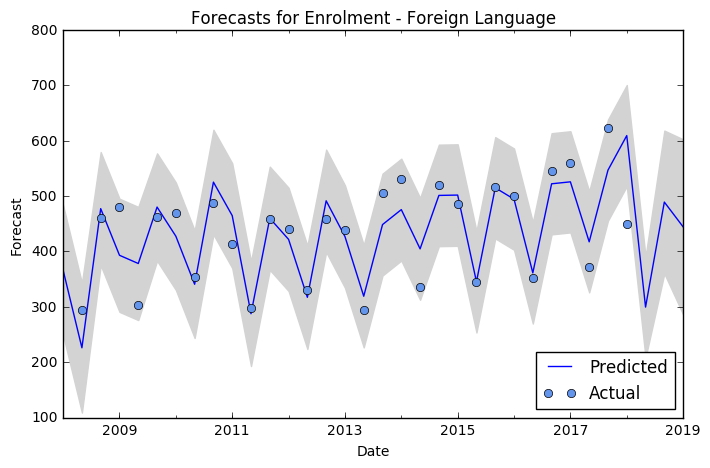

In [50]:
ax_langforeign = predi_mea_langforeign.plot(figsize=(5, 3), label = "Predicted")
df.LangForeign.iloc[6:].plot(figsize=(8, 5), marker='o', color = 'cornflowerblue', 
                          linestyle = 'None', label = "Actual", ax=ax_langforeign)

ax_langforeign.fill_between(predi_con_langforeign.index,
                predi_con_langforeign.iloc[:, 0],
                predi_con_langforeign.iloc[:, 1], color='lightgrey')

ax_langforeign.set_xlabel('Date')
ax_langforeign.set_ylabel('Forecast')
ax_langforeign.set_title('Forecasts for Enrolment - Foreign Language')
plt.legend(loc=4)
plt.show()

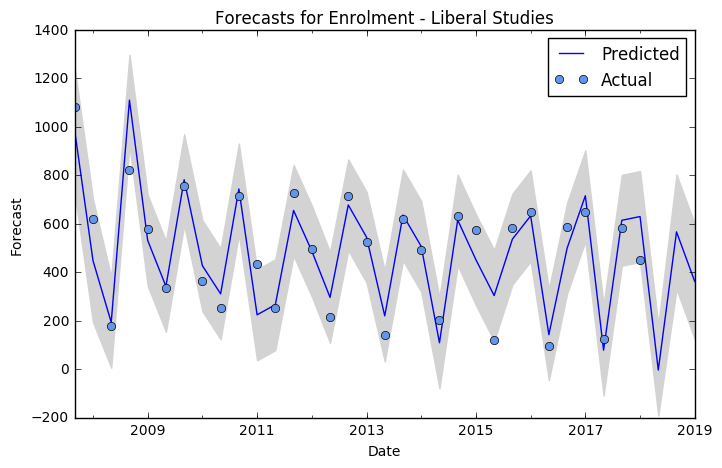

In [51]:
ax_liberal = predi_mea_liberal.plot(figsize=(5, 3), label = "Predicted")
df.LiberalStudies.iloc[4:].plot(figsize=(8, 5), marker='o', color = 'cornflowerblue', 
                          linestyle = 'None', label = "Actual", ax=ax_liberal)

ax_liberal.fill_between(predi_con_liberal.index,
                predi_con_liberal.iloc[:, 0],
                predi_con_liberal.iloc[:, 1], color='lightgrey')

ax_liberal.set_xlabel('Date')
ax_liberal.set_ylabel('Forecast')
ax_liberal.set_title('Forecasts for Enrolment - Liberal Studies')
plt.legend(loc=1)
plt.show()

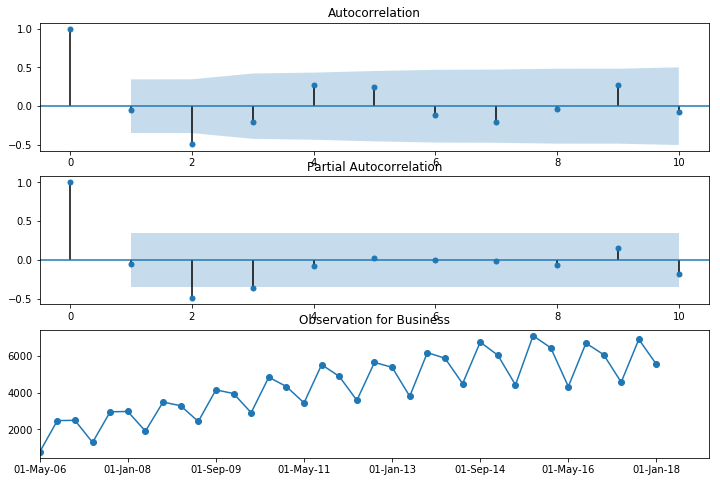

In [45]:
df['first_difference'] = df.Business - df.Business.shift(1)  
df['seasonal_first_difference'] = df.first_difference - df.first_difference.shift(3)

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(311)
fig = sm.graphics.tsa.plot_acf(df.seasonal_first_difference.iloc[4:num1], lags=10, ax=ax1)
ax2 = fig.add_subplot(312)
fig = sm.graphics.tsa.plot_pacf(df.seasonal_first_difference.iloc[4:num1], lags=10, ax=ax2)
ax3 = fig.add_subplot(313)
df.Business.plot(figsize=(12,8), title= 'Observation for Business', marker='o', ax=ax3)
fig

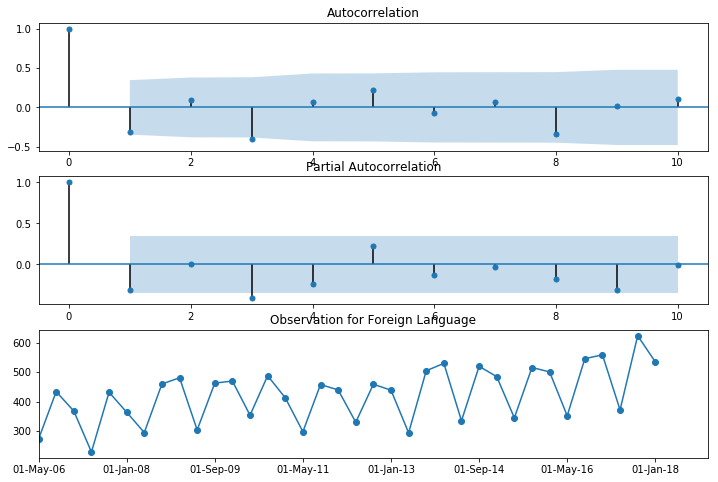

In [46]:
df['first_difference_lf'] = df.LangForeign - df.LangForeign.shift(1)  
df['seasonal_first_difference_langforeign'] = df.first_difference_lf - df.first_difference_lf.shift(3)

fig2 = plt.figure(figsize=(12,8))
ax1 = fig2.add_subplot(311)
fig2 = sm.graphics.tsa.plot_acf(df.seasonal_first_difference_langforeign.iloc[4:num1], lags=10, ax=ax1)
ax2 = fig2.add_subplot(312)
fig2 = sm.graphics.tsa.plot_pacf(df.seasonal_first_difference_langforeign.iloc[4:num1], lags=10, ax=ax2)
ax3 = fig2.add_subplot(313)
df.LangForeign.plot(figsize=(12,8), title= 'Observation for Foreign Language', marker='o', ax=ax3)
fig2

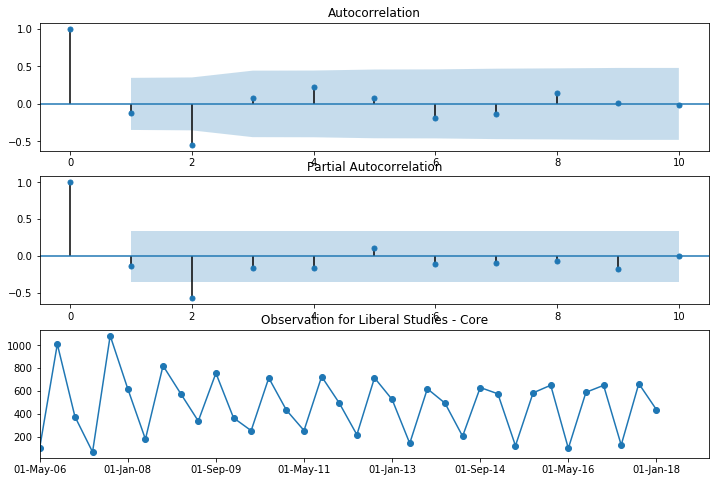

In [47]:
df['first_difference'] = df.LiberalStudies - df.LiberalStudies.shift(1)  
df['seasonal_first_difference'] = df.first_difference - df.first_difference.shift(3)

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(311)
fig = sm.graphics.tsa.plot_acf(df.seasonal_first_difference.iloc[4:num1], lags=10, ax=ax1)
ax2 = fig.add_subplot(312)
fig = sm.graphics.tsa.plot_pacf(df.seasonal_first_difference.iloc[4:num1], lags=10, ax=ax2)
ax3 = fig.add_subplot(313)
df.LiberalStudies.plot(figsize=(12,8), title= 'Observation for Liberal Studies - Core', marker='o', ax=ax3)
fig

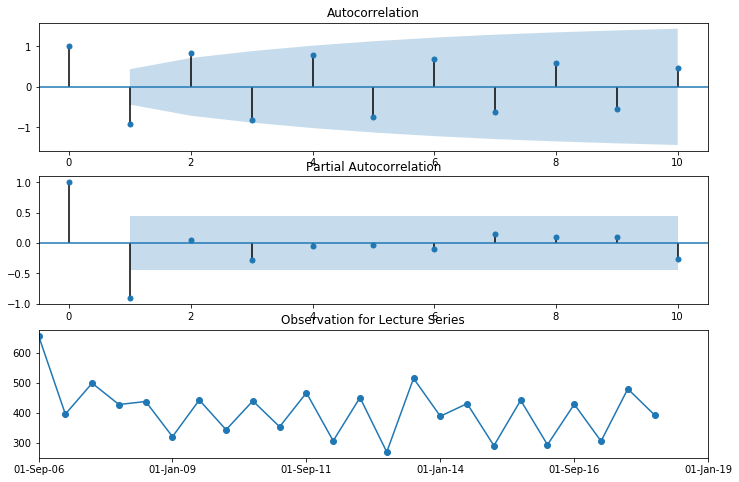

In [48]:
df_lecture = df_lecture.to_frame()
df_lecture['first_difference'] = df_lecture.iloc[:, 0] - df_lecture.iloc[:, 0].shift(1)  
df_lecture['seasonal_first_difference'] = df_lecture.first_difference - df_lecture.first_difference.shift(3)

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(311)
fig = sm.graphics.tsa.plot_acf(df_lecture.seasonal_first_difference.iloc[4:num2], lags=10, ax=ax1)
ax2 = fig.add_subplot(312)
fig = sm.graphics.tsa.plot_pacf(df_lecture.seasonal_first_difference.iloc[4:num2], lags=10, ax=ax2)
ax3 = fig.add_subplot(313)
df_lecture.iloc[:, 0].plot(figsize=(12,8), title= 'Observation for Lecture Series', marker='o', ax=ax3)
fig

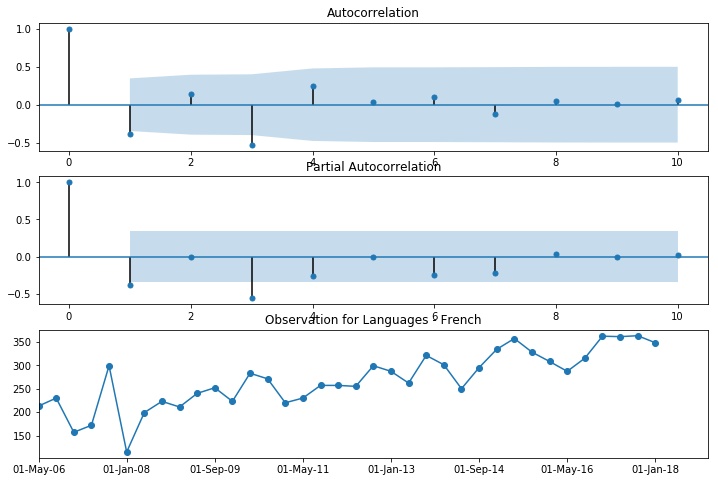

In [49]:
df['first_difference'] = df.LangFrench - df.LangFrench.shift(1)  
df['seasonal_first_difference'] = df.first_difference - df.first_difference.shift(3)

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(311)
fig = sm.graphics.tsa.plot_acf(df.seasonal_first_difference.iloc[4:num1], lags=10, ax=ax1)
ax2 = fig.add_subplot(312)
fig = sm.graphics.tsa.plot_pacf(df.seasonal_first_difference.iloc[4:num1], lags=10, ax=ax2)
ax3 = fig.add_subplot(313)
df.LangFrench.plot(figsize=(12,8), title= 'Observation for Languages - French', marker='o', ax=ax3)
fig

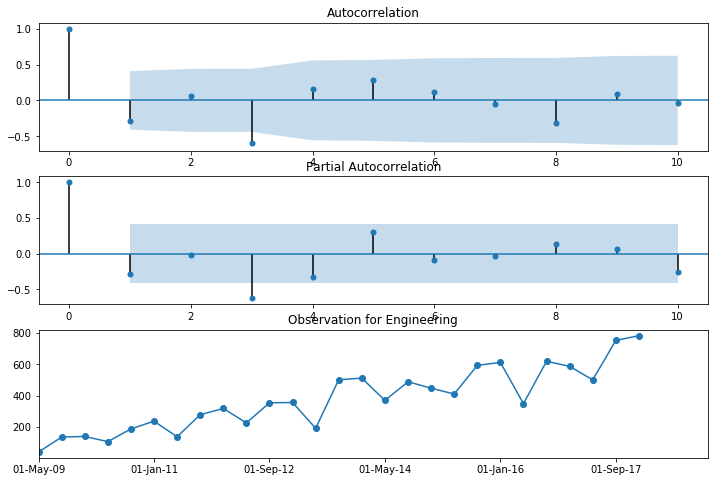

In [50]:
Eng = df.Engineering.iloc[9:]
df['first_difference'] = Eng - Eng.shift(1)  
df['seasonal_first_difference'] = df.first_difference - df.first_difference.shift(3)

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(311)
fig = sm.graphics.tsa.plot_acf(df.seasonal_first_difference.iloc[13:num1], lags=10, ax=ax1)
ax2 = fig.add_subplot(312)
fig = sm.graphics.tsa.plot_pacf(df.seasonal_first_difference.iloc[13:num1], lags=10, ax=ax2)
ax3 = fig.add_subplot(313)
df.Engineering.iloc[9:].plot(figsize=(12,8), title= 'Observation for Engineering', marker='o', ax=ax3)
fig

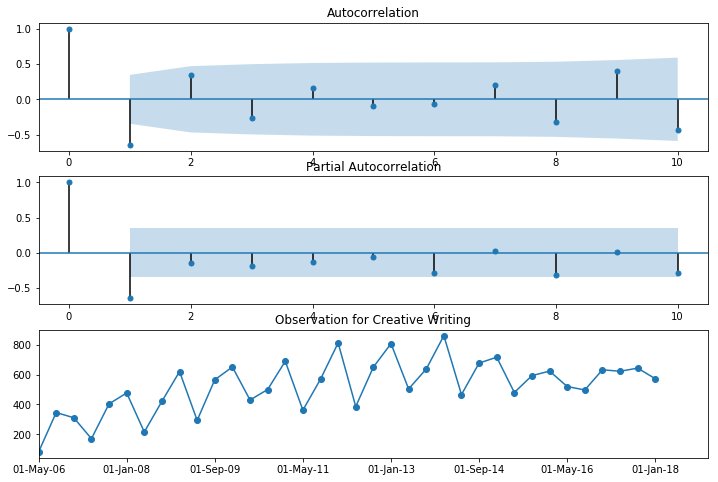

In [51]:
df['first_difference'] = df.CreativeWriting - df.CreativeWriting.shift(1)  
df['seasonal_first_difference'] = df.first_difference - df.first_difference.shift(3)

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(311)
fig = sm.graphics.tsa.plot_acf(df.seasonal_first_difference.iloc[4:num1], lags=10, ax=ax1)
ax2 = fig.add_subplot(312)
fig = sm.graphics.tsa.plot_pacf(df.seasonal_first_difference.iloc[4:num1], lags=10, ax=ax2)
ax3 = fig.add_subplot(313)
df.CreativeWriting.plot(figsize=(12,8), title= 'Observation for Creative Writing', marker='o', ax=ax3)
fig

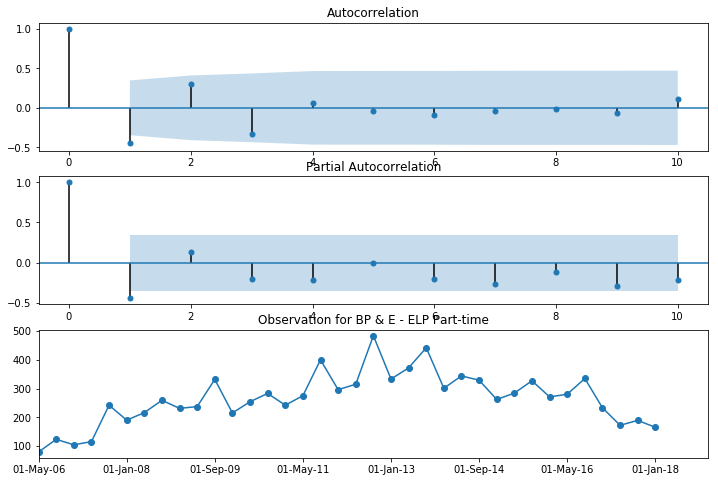

In [52]:
df['first_difference'] = df.BPEELPParttime - df.BPEELPParttime.shift(1)  
df['seasonal_first_difference'] = df.first_difference - df.first_difference.shift(3)

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(311)
fig = sm.graphics.tsa.plot_acf(df.seasonal_first_difference.iloc[4:num1], lags=10, ax=ax1)
ax2 = fig.add_subplot(312)
fig = sm.graphics.tsa.plot_pacf(df.seasonal_first_difference.iloc[4:num1], lags=10, ax=ax2)
ax3 = fig.add_subplot(313)
df.BPEELPParttime.plot(figsize=(12,8), title= 'Observation for BP & E - ELP Part-time', marker='o', ax=ax3)
fig

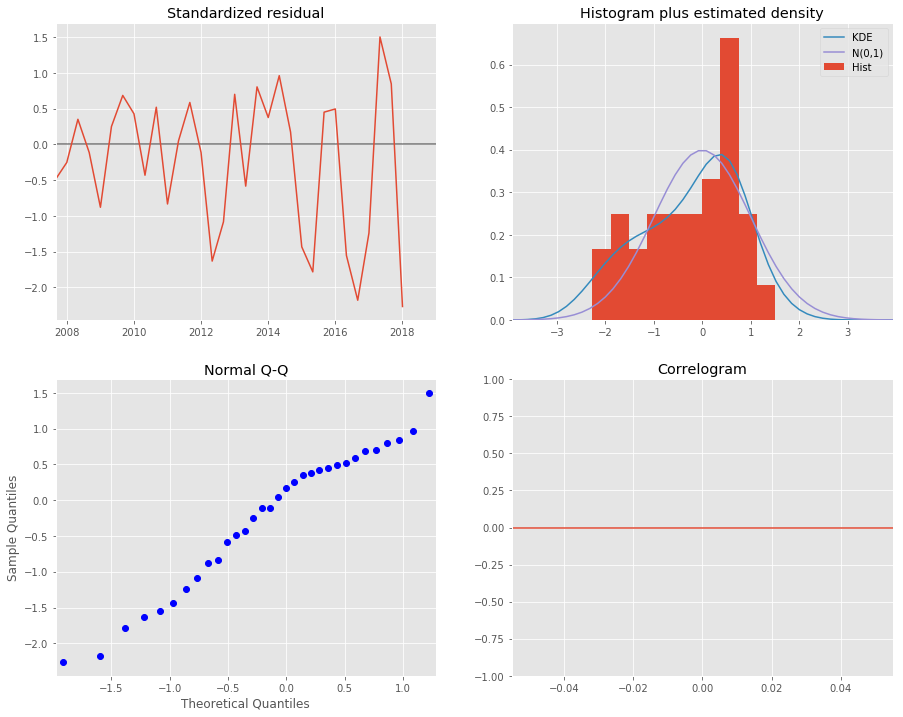

In [53]:
plt.style.use('ggplot')
ax4 = results_business.plot_diagnostics(figsize=(15, 12))
ax4

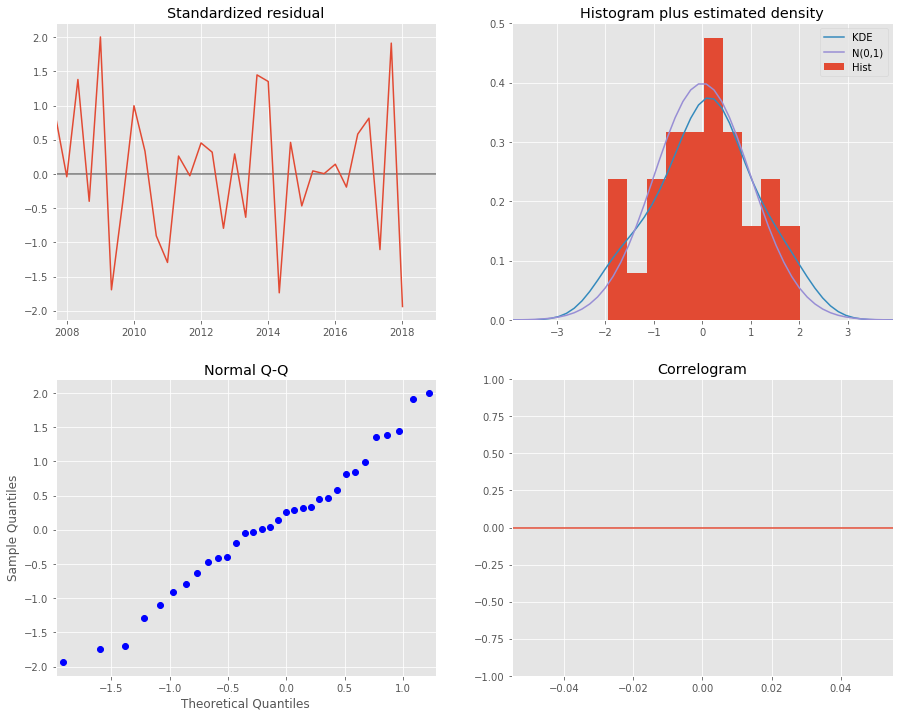

In [54]:
ax5 = results_langforeign.plot_diagnostics(figsize=(15, 12))
ax5

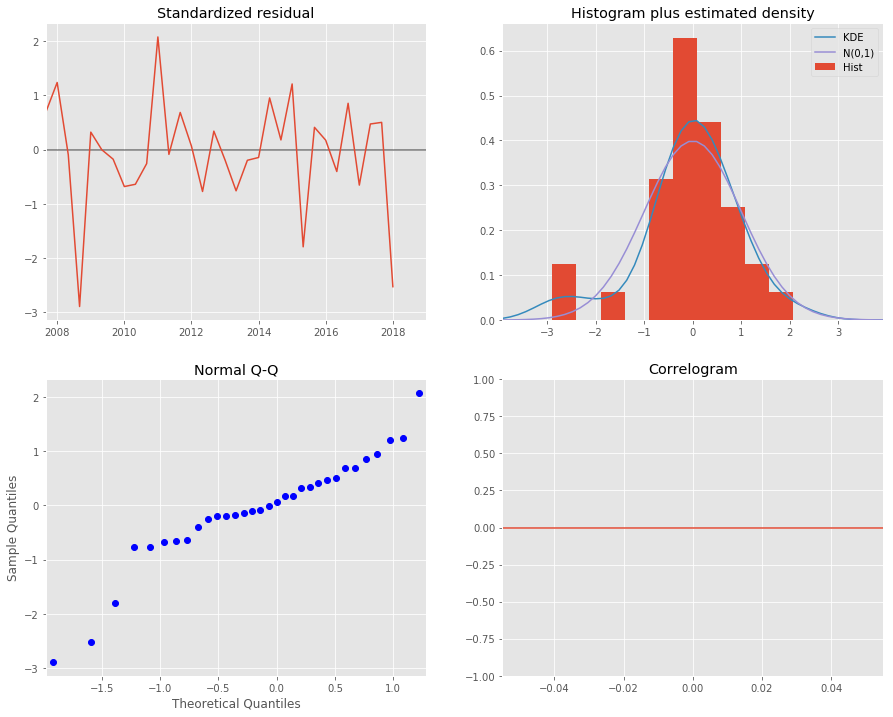

In [55]:
ax6 = results_liberal.plot_diagnostics(figsize=(15, 12))
ax6

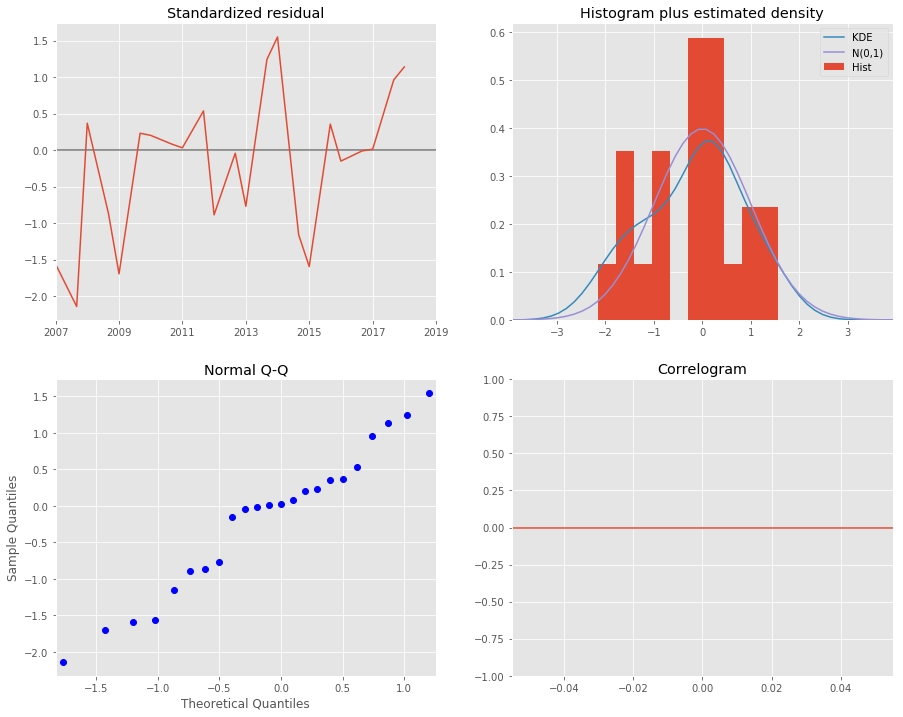

In [56]:
ax7 = results_lecture.plot_diagnostics(figsize=(15, 12))
ax7

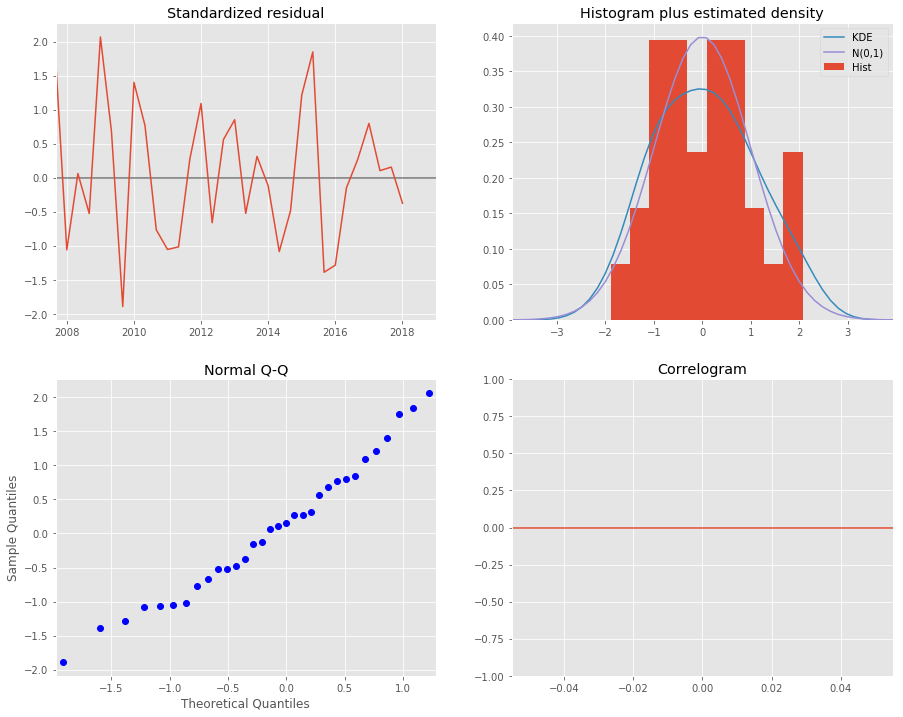

In [57]:
ax8 = results_langfrench.plot_diagnostics(figsize=(15, 12))
ax8

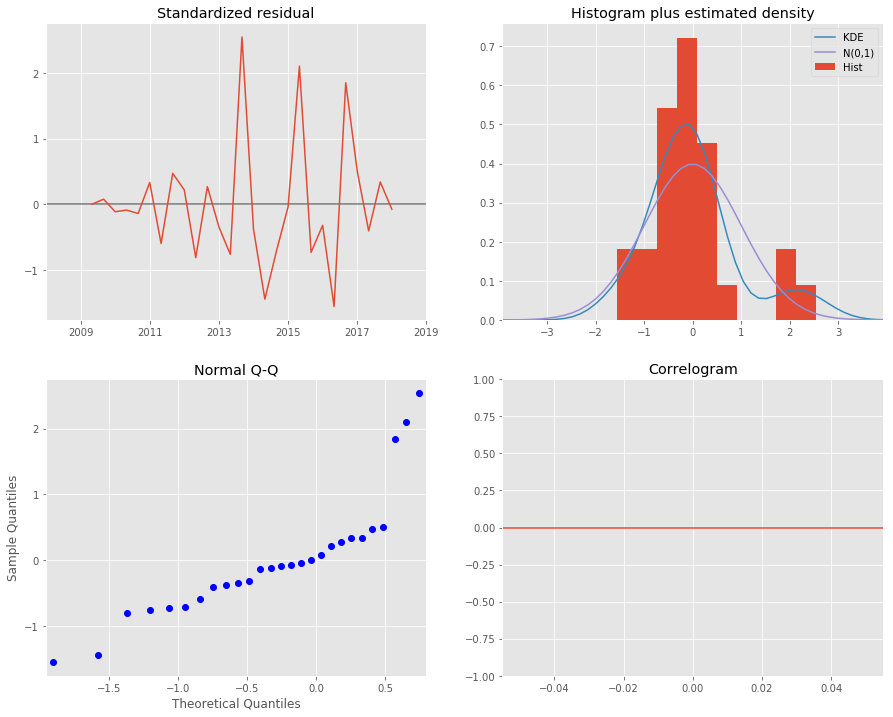

In [58]:
ax9 = results_engineer.plot_diagnostics(figsize=(15, 12))
ax9

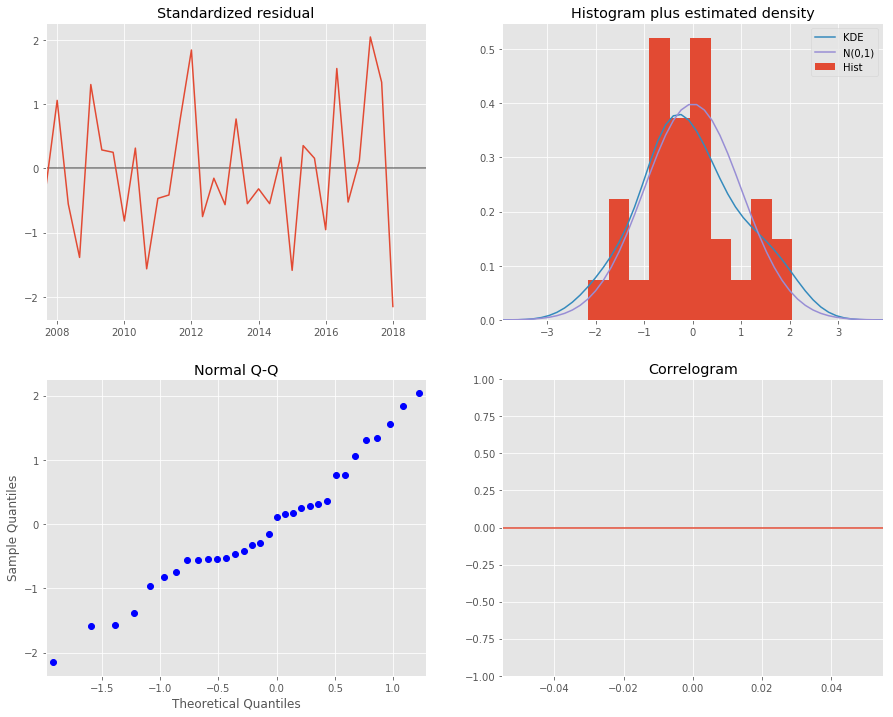

In [59]:
ax10 = results_creative.plot_diagnostics(figsize=(15, 12))
ax10

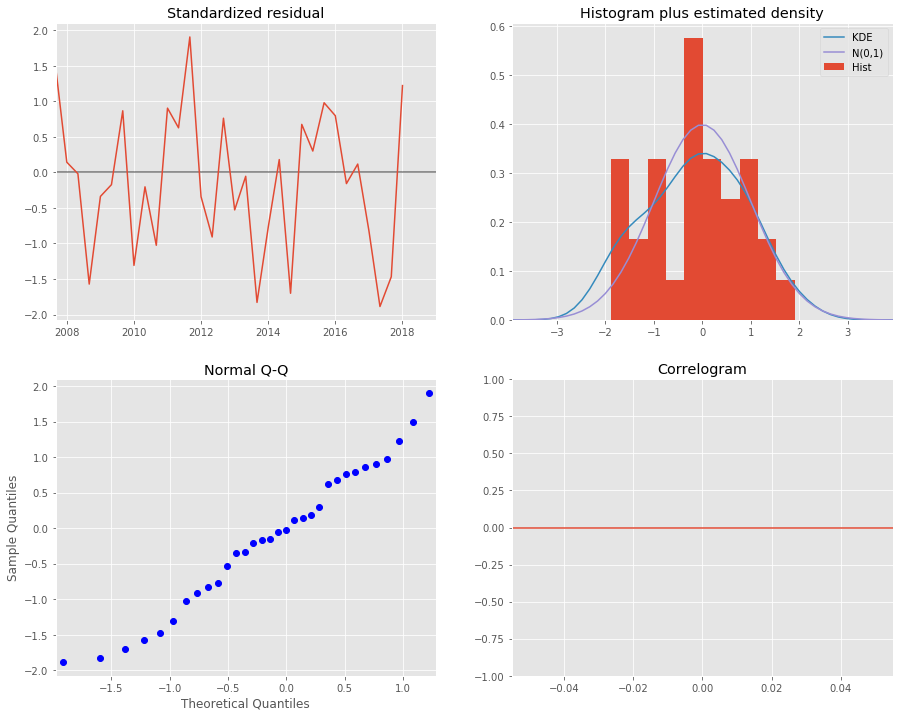

In [60]:
ax11 = results_bpeelppart.plot_diagnostics(figsize=(15, 12))
ax11